In [1]:
import pandas as pd

In [2]:
re = pd.read_csv('result3.csv')

In [3]:
re

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,...,next_longitude,next_arrive_time,기온(°C),누적강수량(mm),풍속(m/s),count,distance_group,weekday,week_group,rain
0,0,0,0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,...,126.554014,24,15.526667,0.0,1.706667,3,2,1,0,0
1,1,1,1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,...,126.557353,36,15.526667,0.0,1.706667,3,3,1,0,0
2,2,2,2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,...,126.561624,40,15.526667,0.0,1.706667,3,4,1,0,0
3,3,3,3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,...,126.542928,42,15.526667,0.0,1.706667,3,5,1,0,0
4,4,4,4,181,2019-10-15,405136001,7997034,360-1,33.484860,126.542928,...,126.543811,92,15.526667,0.0,1.706667,3,5,1,0,0
5,5,5,5,182,2019-10-15,405136001,7997034,360-1,33.473655,126.545425,...,126.545400,20,15.526667,0.0,1.706667,3,2,1,0,0
6,6,6,6,183,2019-10-15,405136001,7997034,360-1,33.458783,126.557353,...,126.561624,36,15.526667,0.0,1.706667,3,4,1,0,0
7,7,7,7,184,2019-10-15,405136001,7997034,360-1,33.479705,126.543811,...,126.542928,84,15.526667,0.0,1.706667,3,5,1,0,0
8,8,8,8,539,2019-10-15,405136001,7997040,360-1,33.478867,126.483833,...,126.488350,158,15.526667,0.0,1.706667,3,4,1,0,0
9,9,9,9,540,2019-10-15,405136001,7997040,360-1,33.478850,126.488350,...,126.489933,54,15.526667,0.0,1.706667,3,3,1,0,0


In [4]:
w = pd.DataFrame(re['풍속(m/s)'].groupby([re['date'],re['now_arrive_time']]).mean())
re['wind'] = 0
re.loc[(re['풍속(m/s)'] > w.mean()[0]) ,['wind']] = 1

In [5]:
re['velocity']=0
re['velocity'] = re['distance']/re['next_arrive_time']

In [60]:
input_var= list( re.columns[22:-1] ) + ['distance']
target=['next_arrive_time']

target2=['velocity']

input_var

['weekday', 'week_group', 'rain', 'wind', 'distance']

In [61]:
X_train=re[input_var]
y_train=re[target2]

X_test=re[input_var]

In [62]:
from sklearn.ensemble import RandomForestRegressor

#코드를 실행하는 다른 사람들에게도 동일한 결과를 보이게 하기 위해, random_state라는 seed number를 임의의 번호로 할당
rf = RandomForestRegressor(random_state=1217)  #RandomForestRegressor 생성

In [63]:
rf.fit(X_train,y_train) #생성된 트리모델을 학습시키는 과정


C:\Users\JMLAP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JMLAP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1217, verbose=0, warm_start=False)

In [64]:
import matplotlib.pyplot as plt
import numpy as np

n_feature = X_train.shape[1] #주어진 변수들의 갯수를 구함
index = np.arange(n_feature)

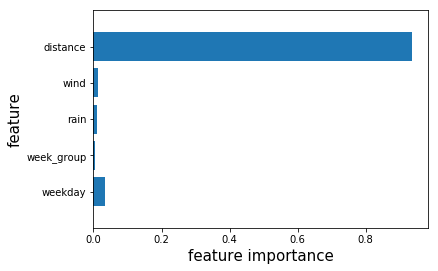

In [65]:
plt.barh(index, rf.feature_importances_, align='center') #
plt.yticks(index, input_var)
plt.ylim(-1, n_feature)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.show()